In [1]:
import cycledata as cd
import os
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
from matplotlib.mlab import csv2rec

%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

class MyFormatter(ticker.Formatter):
    def __init__(self, dates, fmt='%Y-%m-%d'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        'Return the label for time x at position pos'
        ind = int(round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''
        return self.dates[ind].strftime(self.fmt)

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(16,12))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.Count, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
datafile = cbook.get_sample_data('msft.csv', asfileobj=False)
print('loading %s' % datafile)
r = csv2rec(datafile)[-40:]

formatter = MyFormatter(r.date)

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.plot(np.arange(len(r)), r.close, 'o-')
fig.autofmt_xdate()
plt.show()

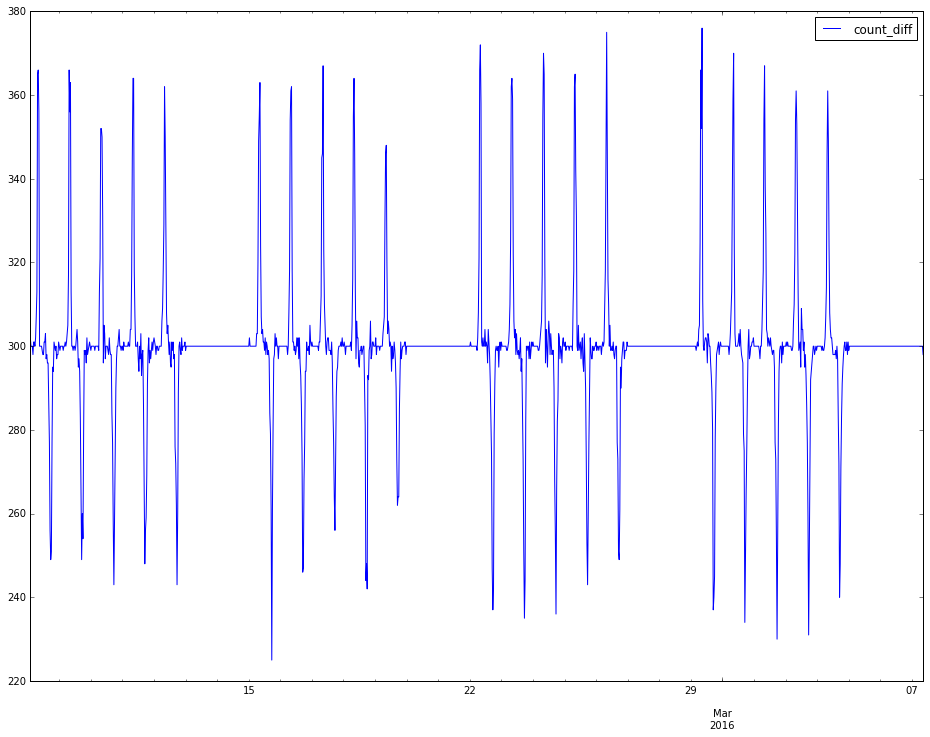

In [16]:
ModelWD.DF.plot(figsize=(16,12))
# # ax.set_xticklabels(ModelWD.DF.index)
# # ax.set_xticks(range(len(ModelWD.DF.index)))
# # fig.autofmt_xdate()
# # 
# plt.figure()
# plt.plot(ModelWD.DF, use_index=False, figsize=(16,12))
# plt.show()

# fig, ax = plt.subplots()
# xs.plot(use_index=False)
# # ax.set_xticklabels(pd.to_datetime(ts))
# ax.set_xticks(range(len(Model.DF.index)))
# fig.autofmt_xdate()
# plt.show()

In [ ]:
formatter = MyFormatter(ModelWD.DF.index.date)

fig, ax = plt.subplots()
# ax.figsize=(16,12)
ax.xaxis.set_major_formatter(formatter)
ax.plot(np.arange(len(ModelWD.DF)), ModelWD.DF.count_diff)

fig.autofmt_xdate()
plt.show()

In [ ]:
# Import daily counts for all years
WDdays = {}
WEdays = {}
WDdays, WEdays = cd.Import('daily')

In [2]:
# Import seperated weeks for all years
WD = {}
WE = {}
WD, WE = cd.Import('split')
# Find most recent 4 weeks of data to Model
recentWD, recentWE = cd.Recent(WD, WE)

Reading: 2012Weekdays.csv
Reading: 2012WeekEnds.csv
Reading: 2013Weekdays.csv
Reading: 2013WeekEnds.csv
Reading: 2014Weekdays.csv
Reading: 2014WeekEnds.csv
Reading: 2015Weekdays.csv
Reading: 2015WeekEnds.csv
Reading: 2016Weekdays.csv
Reading: 2016WeekEnds.csv


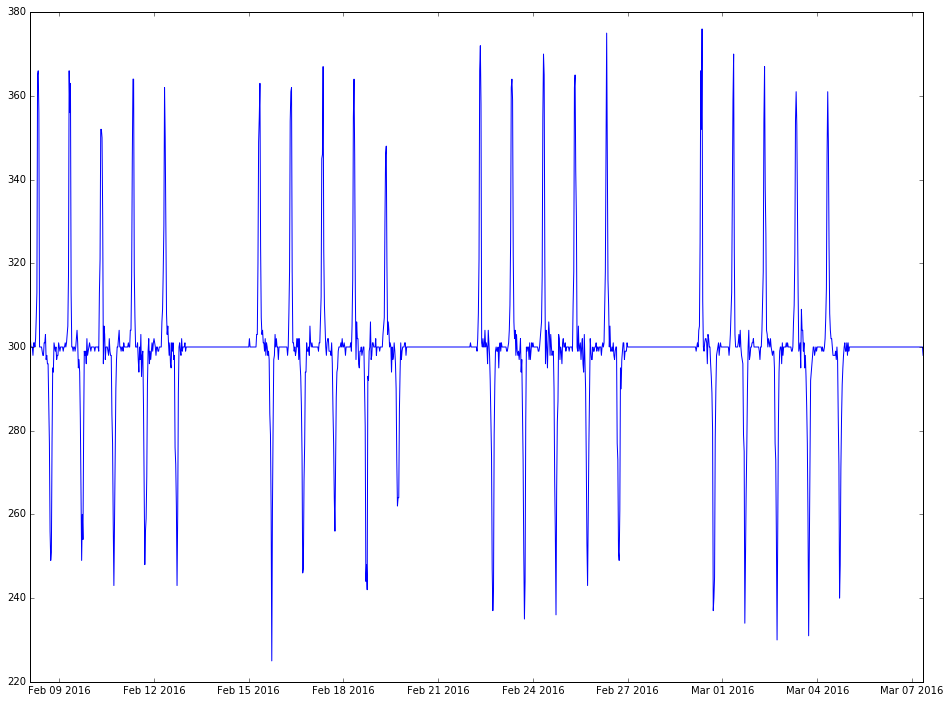

In [3]:
ModelWD = cd.Model(recentWD, 14)
ModelWD.PreProcess()
ModelWD.DF.head()
plt.figure(figsize=(16,12))
plt.plot(ModelWD.DF)

In [ ]:
daily15 = WDdays['2015']
# daily15.set_index(daily15, drop=True, inplace=True)
daily15 = daily15['1-2015':'12-2015'].dropna()
daily15.plot(figsize=(16,12))
daily15.describe()

In [ ]:
WDs, WEs = JoinYears(WDdays, WEdays)
WDs.plot(figsize=(16,12))
WEs.plot(figsize=(16,12))

In [ ]:
WDs_log = np.log(WDs)
moving_avg = pd.rolling_mean(WDs_log, 30)
fig = plt.figure(figsize=(16,12))
plt.plot(WDs_log)
plt.plot(moving_avg, color='red')

In [ ]:
log_moving_avg_diff = WDs_log - moving_avg
log_moving_avg_diff.dropna(inplace=True)
expweighted_avg = pd.ewma(WDs_log, halflife=30)
WDs_log_ewma_diff = WDs_log - expweighted_avg
plt.figure(figsize=(16,12))
plt.plot(WDs_log)
plt.plot(expweighted_avg, color='red')
test_stationarity(WDs)
test_stationarity(log_moving_avg_diff)
test_stationarity(WDs_log_ewma_diff)

In [ ]:
# Creating High Resolution Figures
os.chdir(cd.wd)
a=1 # Transparency
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)

# Remove grid lines (dotted lines inside plot)
ax.grid(False)
# Remove plot frame
#ax.set_frame_on(False)
# Pandas trick: remove weird dotted line on axis
#ax.lines[0].set_visible(False)

# Set x axis label on top of plot, set label text
# ax.xaxis.set_label_position('bottom')
# xlab = 'Date'
# ax.set_xlabel(xlab, fontsize=16, alpha=a, ha='left')
# ax.xaxis.set_label_coords(0, 1.04)

# Set Title
ttl = "2014 Daily Cycle Hire Usage"
#fig.suptitle(ttl, fontsize=21)
plt.title(ttl, fontsize=22, y=1.03)

# Customize y tick labels
#yticks = [0,5000,10000,15000,20000,25000,35000,40000,45000,50000]
#ax.set_yticklabels(yticks, fontsize=16, alpha=a)
#ax.yaxis.set_tick_params(pad=12)  

# Customize x tick lables
#xticks = [5,10,20,50,80]
#ax.xaxis.set_ticks(xticks)
#ax.set_xticklabels(fontsize=16, alpha=a)
 

#DailyUsage['2014'].plot(figsize=(12,8), legend=False, ax=ax, title=ttl)
plt.plot(DailyUsage['2014'])

# Save figure in png with tight bounding box
plt.savefig('test_fig.png', bbox_inches='tight', dpi=300)